# EDA Student Performance Indicator



1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, 
Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

3) Dataset Information

   gender : sex of students -> (Male/female)

   race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

   parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

   lunch : having lunch before test (standard or free/reduced)

   test preparation course : complete or not complete before test

   math score

   reading score

   writing score

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
# load the dataset
df = pd.read_csv('StudentsPerformancea.csv')

In [14]:
# first five rows of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
# size of the dataset
df.shape

(1000, 8)

3. Data Checks to perform

    Check Missing values
      
    Check Duplicates

    Check data type

    Check the number of unique values of each column

    Check statistics of data set

    Check various categories present in the different categorical column

In [16]:
# Checking Missing Values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## So from the above observation we came to the conclusion that the dataset has no missing values

In [17]:
# Check Duplicates
df.duplicated().sum()

0

## So from the above observation we came to the conclusion that the dataset has no duplicates

In [18]:
# Check Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
# Checking the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
# Checking the Statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# So from the above observation, we have come to the conclusion that

### 1. The mean value ranges between 66 to 69 
### 2. The standard deviation ranges between 14-15 and is very close to one another.
### 3. The minimum value for maths score is 0 and rest is 17 and 10

In [21]:
numerical_features = [feature for feature in df.columns if(df[feature].dtype != 'O')]

categorical_features = [feature for feature in df.columns if (df[feature].dtype == 'O')]

In [22]:
print("Numerical features are:", numerical_features)

print("Categorical features are:", categorical_features)

Numerical features are: ['math_score', 'reading_score', 'writing_score']
Categorical features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [23]:
# Aggrgrate the total score with mean



df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])
df['average_score'] = df['total_score']/3
#df['average_score'] = df['total_score']/3

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
import seaborn as sns

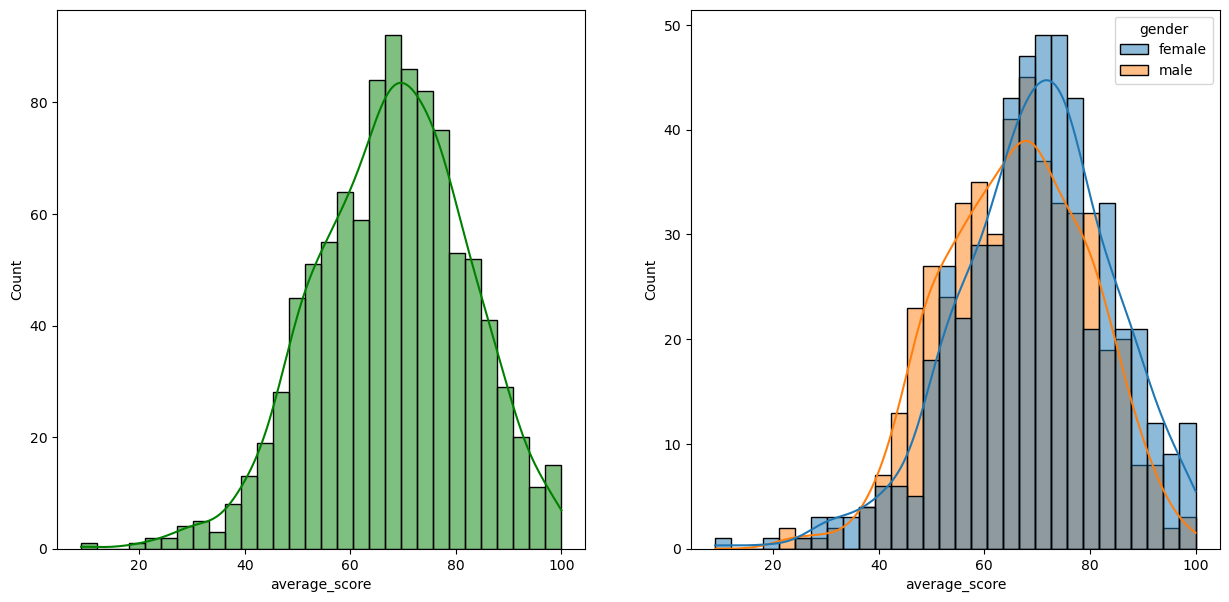

In [53]:
# Explore more about visulaizations
fig, axis = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average_score', bins = 30, color = 'g', kde = True)
plt.subplot(122)
sns.histplot(data = df, x = 'average_score', bins = 30, hue = 'gender', kde = True)
plt.show()

## So from the above observation , we came to the conclusion that female perform better than  the male

In [27]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


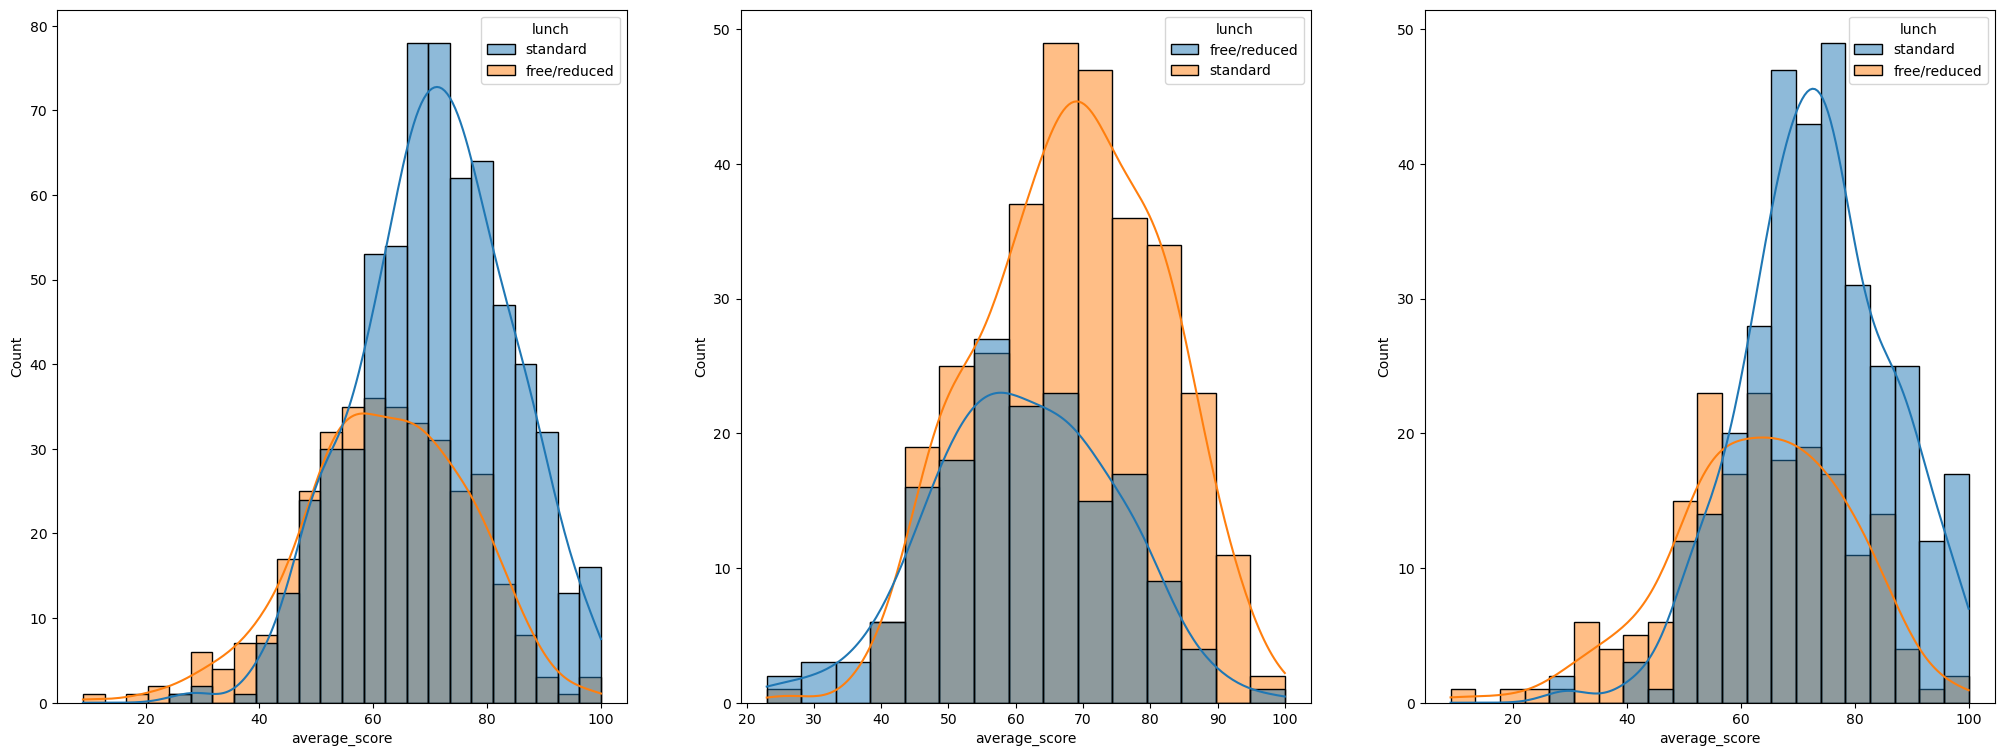

In [55]:
fig, axis = plt.subplots(1, 3, figsize = (25,9))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', color = 'b', hue = 'lunch',  kde = True)
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', color = 'r', hue = 'lunch', kde = True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', color = 'b', hue = 'lunch',  kde = True)
plt.show()

# Observation
  Standard Lunch helps the students to perform better in the exams.

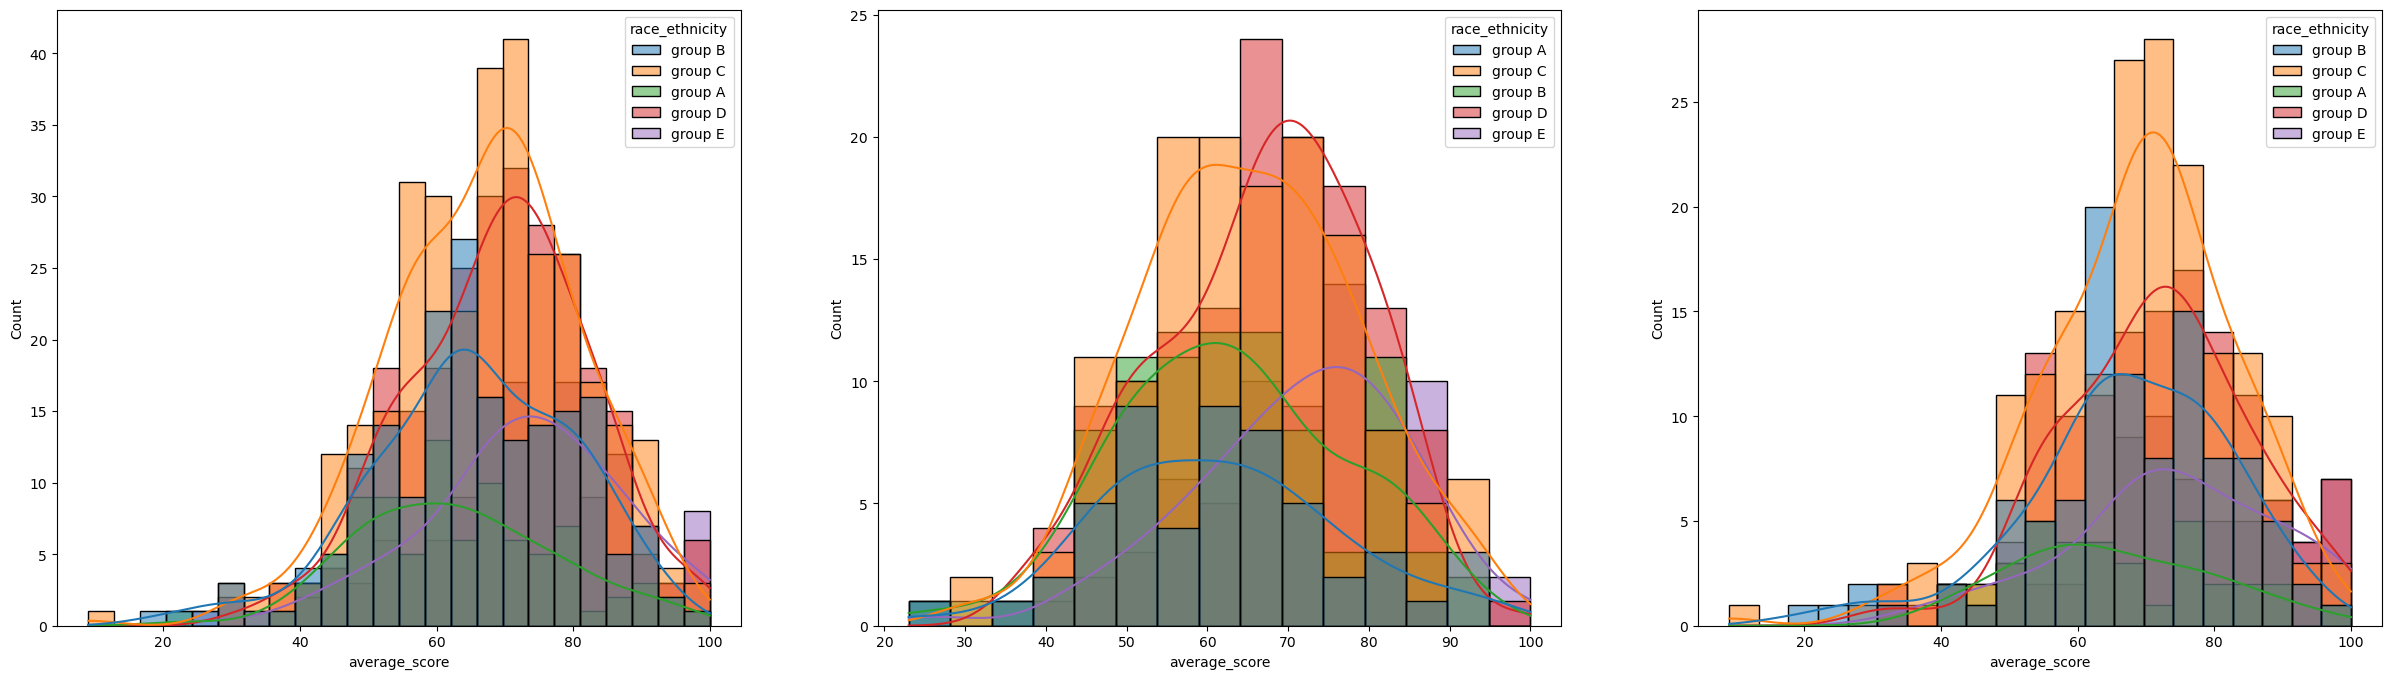

In [56]:
fig, axis = plt.subplots(1, 3, figsize = (30,8))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', color = 'r', hue = 'race_ethnicity',  kde = True)
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', color = 'b', hue = 'race_ethnicity',  kde = True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', color = 'r', hue = 'race_ethnicity',  kde = True)
plt.show()

# Observation

 Group A or Group B tens to perform poorly in the exams whether it is male or female.

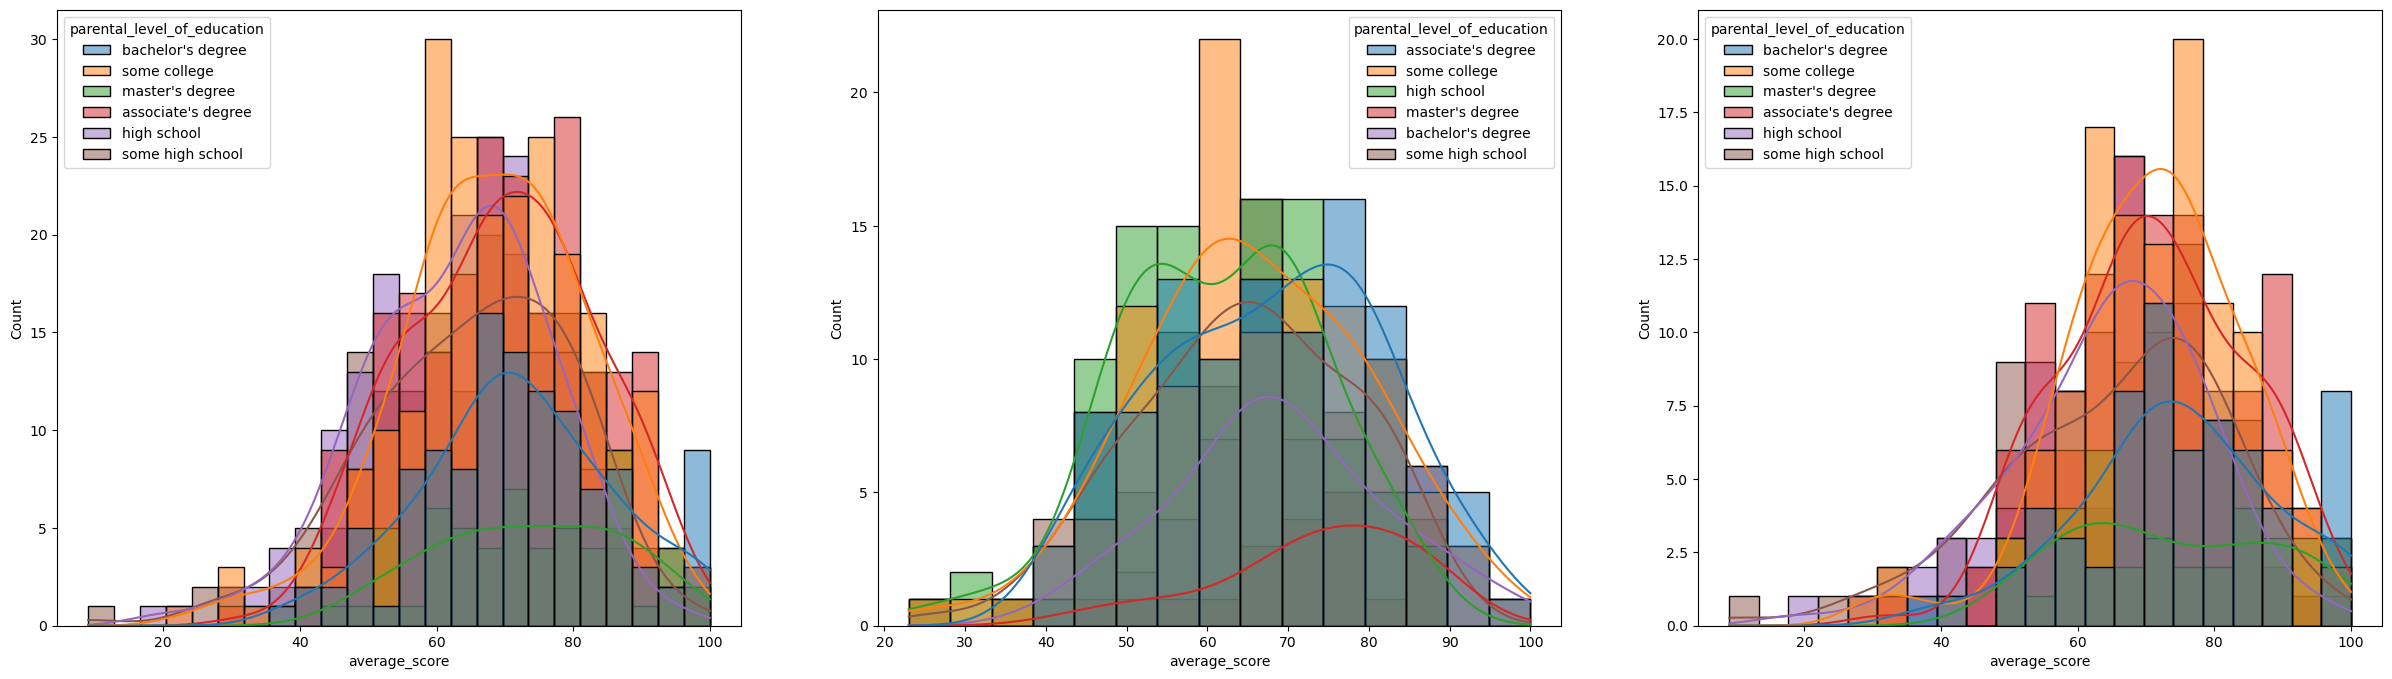

In [57]:
fig, axis = plt.subplots(1, 3, figsize = (30,8))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', color = 'r', hue = 'parental_level_of_education',  kde = True)
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', color = 'b', hue = 'parental_level_of_education',  kde = True)
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', color = 'r', hue = 'parental_level_of_education',  kde = True)
plt.show()

# Observation
 1. Parental level of Education do not help the students to perform better.
    
 2. Parental level of education whose degree is associate their male child tend to perform better.

 3. Parental level of education for female child do not have any impact.


In [58]:
#sns.pairplot(df)

<AxesSubplot: >

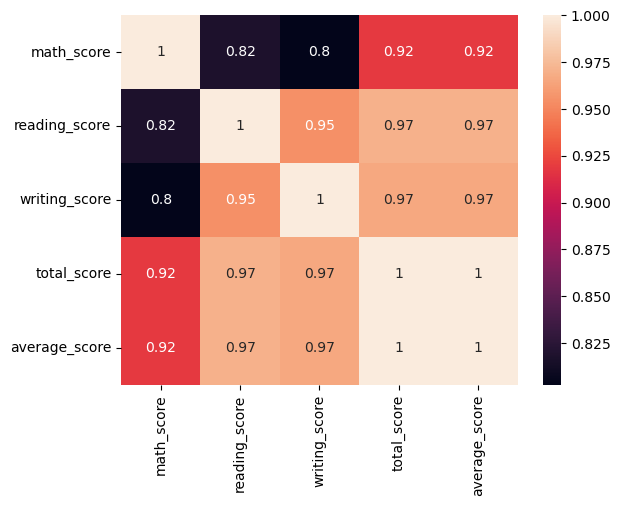

In [59]:
# Diagrammatic Representation for Correlation
sns.heatmap(df.corr(), annot = True)